In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73,218
1,female,group C,some college,standard,completed,69,90,88,82,247
2,female,group B,master's degree,standard,none,90,95,93,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,148
4,male,group C,some college,standard,none,76,78,75,76,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   average_score                1000 non-null   int64 
 9   total_score                  1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:
# List of columns in your dataset
columns = df[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]

# Loop through each column and print the unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'gender': ['female' 'male']
Unique values in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in 'lunch': ['standard' 'free/reduced']
Unique values in 'test_preparation_course': ['none' 'completed']


# UNIVARAITE ANALYSIS

In [22]:
df.describe()

,math_score,reading_score,writing_score,average_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.762000,203.312000
std,15.16308,14.600192,15.195657,14.258354,42.771978
min,0.00000,17.000000,10.000000,9.000000,27.000000
25%,57.00000,59.000000,57.750000,58.000000,175.000000
50%,66.00000,70.000000,69.000000,68.000000,205.000000
75%,77.00000,79.000000,79.000000,78.000000,233.000000
max,100.00000,100.000000,100.000000,100.000000,300.000000


**Interpretation:**

1. Looking at these scores, it appears that, on average, students are doing fairly well in their exams.

2. **Math**, **reading**, and **writing scores** are quite similar, suggesting that students are maintaining a consistent level of performance across these subjects.

3. The **total score** gives us an idea of their overall achievement, and it's around two-thirds of the maximum possible score, which indicates a solid academic performance among this group of students.


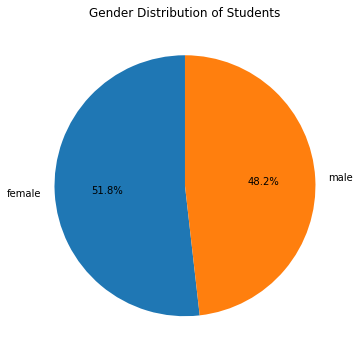

In [23]:
# Calculate the count of students in each gender category
gender_counts = df['gender'].value_counts()

# Calculate the percentage of students in each gender category
gender_percentages = (gender_counts / len(df)) * 100

# Create a pie chart to visualize the gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_percentages, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Students')
plt.show()

We can see that **Females** Students are in more numbers than **Males** students 

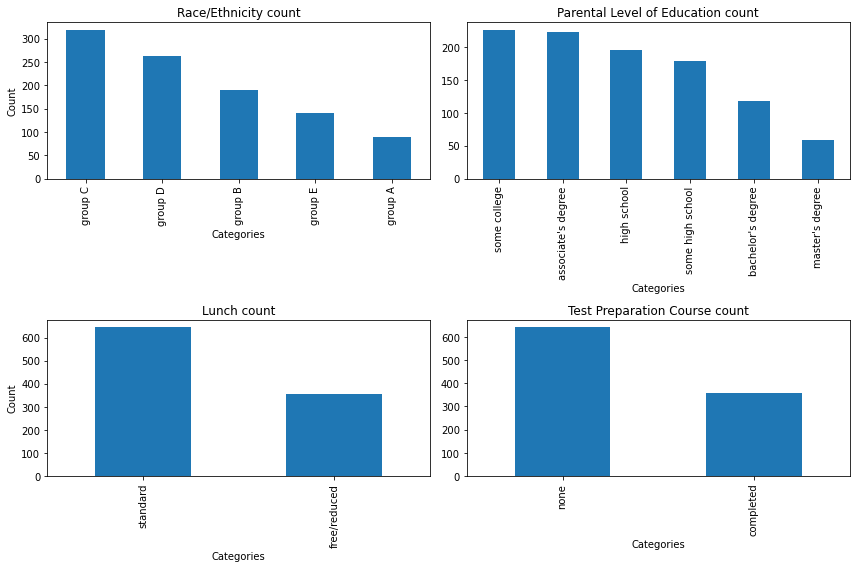

In [24]:
race_counts = df['race_ethnicity'].value_counts()
race_percentages = (race_counts / len(df)) * 100

parental_counts = df['parental_level_of_education'].value_counts()
parental_percentages = (parental_counts / len(df)) * 100

lunch_counts = df['lunch'].value_counts()
lunch_percentages = (lunch_counts / len(df)) * 100

prep_counts = df['test_preparation_course'].value_counts()
prep_percentages = (prep_counts / len(df)) * 100

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the stacked bar charts for each variable
race_counts.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Race/Ethnicity count')

parental_counts.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Parental Level of Education count')

lunch_counts.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Lunch count')

prep_counts.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Test Preparation Course count')

# Set labels for the x-axes
for ax in axes.flat:
    ax.set_xlabel('Categories')

# Set labels for the y-axes
axes[0, 0].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

1. we can see that in race / ethnicity the group C students are in more numbers than others and also Group A is the smallest number of students in an Ethnicity 

2. Very less parents of students have done masters and bachelors degree where most of them have studied in some college and done some associate degree and also we can see that few have finished thier high school

3. students getting standard food are greater than students who are getting free food 

4. Many students had not completed test preparation course , only 300 students had completed out of 1000 students 

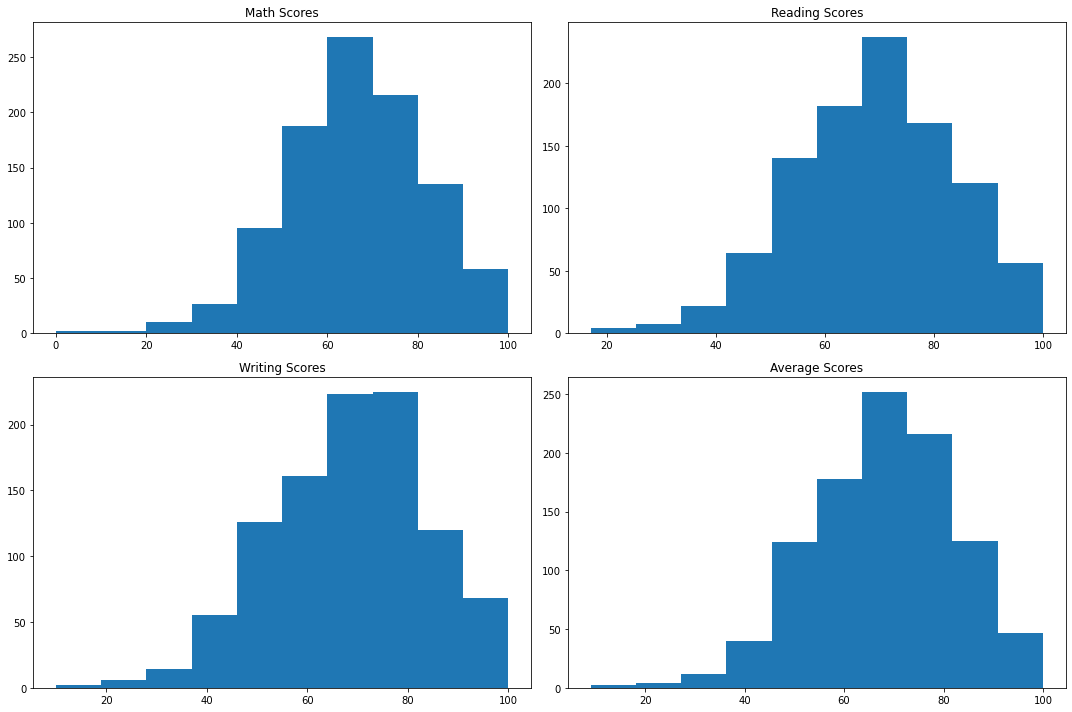

In [33]:
# Create 3x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Math histogram  
axs[0, 0].hist(df['math_score'])
axs[0, 0].set_title('Math Scores')

# Reading histogram
axs[0, 1].hist(df['reading_score'])
axs[0, 1].set_title('Reading Scores')

# Writing histogram
axs[1, 0].hist(df['writing_score'])  
axs[1, 0].set_title('Writing Scores')

# Average histogram
axs[1, 1].hist(df['average_score'])
axs[1, 1].set_title('Average Scores')

# Tighten layout and show plot
fig.tight_layout()
plt.show()

All the 4 Scores seems like following normal distribution but we can notice that there is spme devaition towards lower scores from the mean score which may cause outliers 

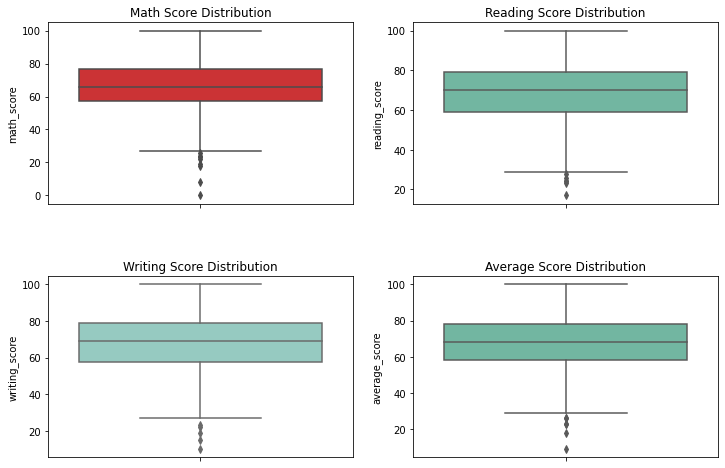

In [11]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Create box plots for Math Score, Reading Score, Writing Score, and Average Score
sns.boxplot(ax=axes[0, 0], data=df, y='math_score', palette='Set1')
axes[0, 0].set_title('Math Score Distribution')

sns.boxplot(ax=axes[0, 1], data=df, y='reading_score', palette='Set2')
axes[0, 1].set_title('Reading Score Distribution')

sns.boxplot(ax=axes[1, 0], data=df, y='writing_score', palette='Set3')
axes[1, 0].set_title('Writing Score Distribution')

sns.boxplot(ax=axes[1, 1], data=df, y='average_score', palette='Set2')  # Using 'Set2' palette again
axes[1, 1].set_title('Average Score Distribution')

# Display the plot
plt.show()

From the above box plots for 4 scores , the students who are scoring less are being considered outliers which means they are so devaited from most of the students when compared to score

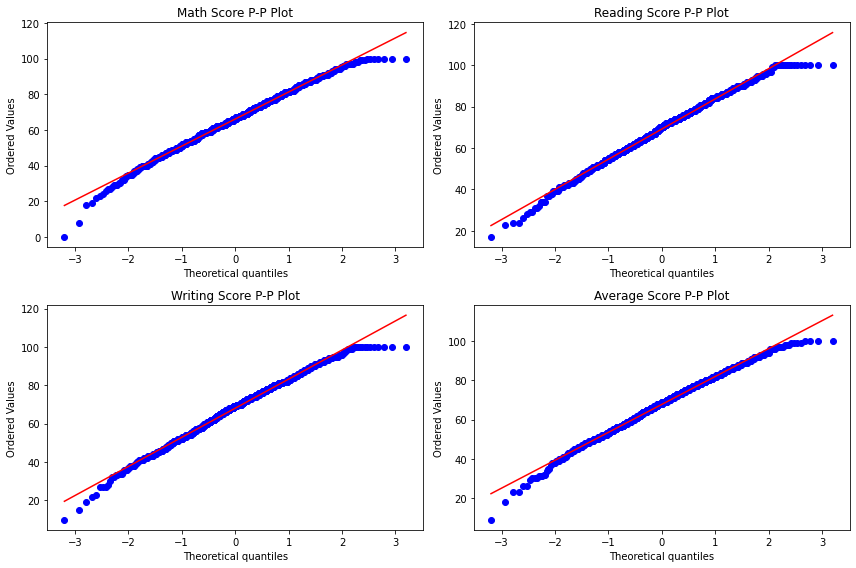

In [12]:
# Data for the four variables
math_scores = df['math_score']
reading_scores = df['reading_score']
writing_scores = df['writing_score']
average_scores = df['average_score']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot P-P plots for Math Score
stats.probplot(math_scores, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title("Math Score P-P Plot")

# Plot P-P plots for Reading Score
stats.probplot(reading_scores, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Reading Score P-P Plot")

# Plot P-P plots for Writing Score
stats.probplot(writing_scores, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Writing Score P-P Plot")

# Plot P-P plots for Average Score
stats.probplot(average_scores, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Average Score P-P Plot")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The above 4 P-P plot implies that all the 4 scores follows normality since the most of the scores passes through the striaght line and very few is devaited from the line

In [48]:
import pandas as pd
from scipy.stats import kstest, norm

# Data for the variables
math_scores = df['math_score']
reading_scores = df['reading_score']
writing_scores = df['writing_score']
average_scores = df['average_score']

# Create a list of variable names
variables = ['Math Scores', 'Reading Scores', 'Writing Scores', 'Average Scores']

# Initialize lists to store results
ks_statistic = []
p_value = []
is_normal = []

# Perform KS test for each variable
for var in [math_scores, reading_scores, writing_scores, average_scores]:
    ks_stat, p = kstest(var, 'norm', args=(var.mean(), var.std()))
    ks_statistic.append(ks_stat)
    p_value.append(p)
    alpha = 0.05  # Significance level
    is_normal.append(p > alpha)

# Create a results DataFrame
results_df = pd.DataFrame({
    'Variable': variables,
    'KS Statistic': ks_statistic,
    'P-Value': p_value,
    'Is Normal': is_normal
})

# Display the results
print(results_df)



         Variable  KS Statistic   P-Value  Is Normal
0     Math Scores      0.030855  0.290952       True
1  Reading Scores      0.043874  0.041308      False
2  Writing Scores      0.041582  0.061216       True
3  Average Scores      0.039659  0.083792       True


In [15]:
import pandas as pd
from scipy.stats import shapiro

# Data for the variables
math_scores = df['math_score']
reading_scores = df['reading_score']
writing_scores = df['writing_score']
average_scores = df['average_score']

# Create a list of variable names
variables = ['Math Scores', 'Reading Scores', 'Writing Scores', 'Average Scores']

# Initialize lists to store results
shapiro_statistic = []
p_value = []
is_normal = []

# Perform Shapiro-Wilk test for each variable
for var in [math_scores, reading_scores, writing_scores, average_scores]:
    shapiro_stat, p = shapiro(var)
    shapiro_statistic.append(shapiro_stat)
    p_value.append(p)
    alpha = 0.05  # Significance level
    is_normal.append(p > alpha)

# Create a results DataFrame
results_df = pd.DataFrame({
    'Variable': variables,
    'Shapiro Statistic': shapiro_statistic,
    'P-Value': p_value,
    'Is Normal': is_normal
})

# Display the results
print(results_df)


         Variable  Shapiro Statistic   P-Value  Is Normal
0     Math Scores           0.993151  0.000145      False
1  Reading Scores           0.992921  0.000106      False
2  Writing Scores           0.991963  0.000029      False
3  Average Scores           0.992916  0.000105      False


# BI-Variate Analysis

In [ ]:
df.head()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")



C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

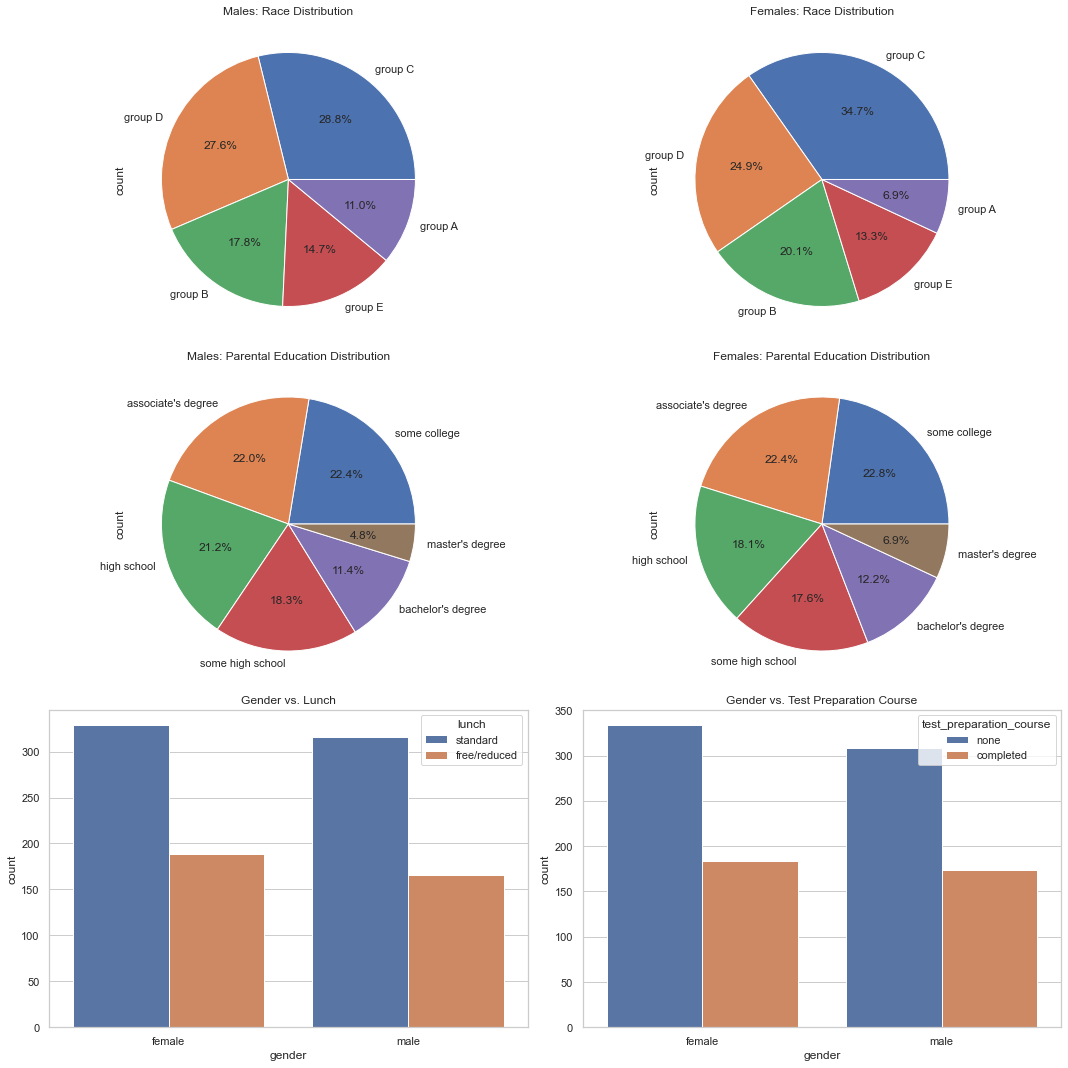

In [51]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender vs. race as pie chart for males
males = df[df['gender'] == 'male']
males['race_ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0])
axes[0, 0].set_title('Males: Race Distribution')

# Plot gender vs. race as pie chart for females
females = df[df['gender'] == 'female']
females['race_ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title('Females: Race Distribution')

# Plot gender vs. parental level of education as pie chart for males
males['parental_level_of_education'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title('Males: Parental Education Distribution')

# Plot gender vs. parental level of education as pie chart for females
females['parental_level_of_education'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Females: Parental Education Distribution')

# Plot gender vs. lunch
sns.countplot(x='gender', hue='lunch', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Gender vs. Lunch')

# Plot gender vs. test preparation course
sns.countplot(x='gender', hue='test_preparation_course', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Gender vs. Test Preparation Course')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
pip install circlify

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

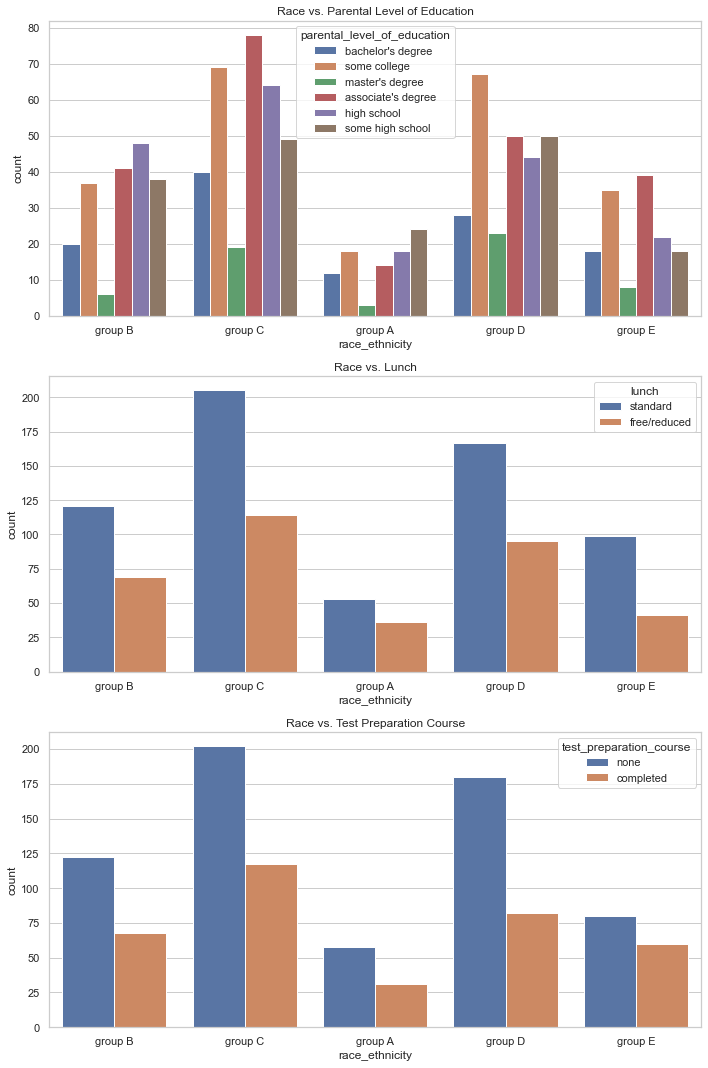

In [52]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot race/ethnicity vs. parental level of education
sns.countplot(x='race_ethnicity', hue='parental_level_of_education', data=df, ax=axes[0])
axes[0].set_title('Race vs. Parental Level of Education')

# Plot race/ethnicity vs. lunch
sns.countplot(x='race_ethnicity', hue='lunch', data=df, ax=axes[1])
axes[1].set_title('Race vs. Lunch')

# Plot race/ethnicity vs. test preparation course
sns.countplot(x='race_ethnicity', hue='test_preparation_course', data=df, ax=axes[2])
axes[2].set_title('Race vs. Test Preparation Course')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

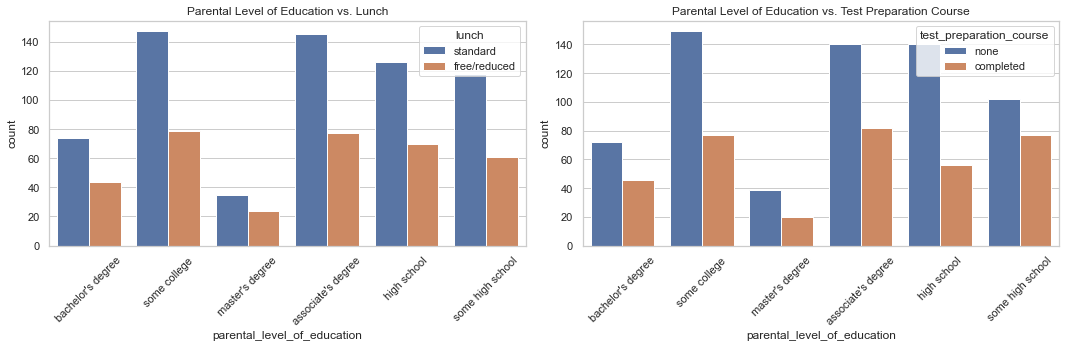

In [53]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot parental level of education vs. lunch
sns.countplot(x='parental_level_of_education', hue='lunch', data=df, ax=axes[0])
axes[0].set_title('Parental Level of Education vs. Lunch')

# Plot parental level of education vs. test preparation course
sns.countplot(x='parental_level_of_education', hue='test_preparation_course', data=df, ax=axes[1])
axes[1].set_title('Parental Level of Education vs. Test Preparation Course')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

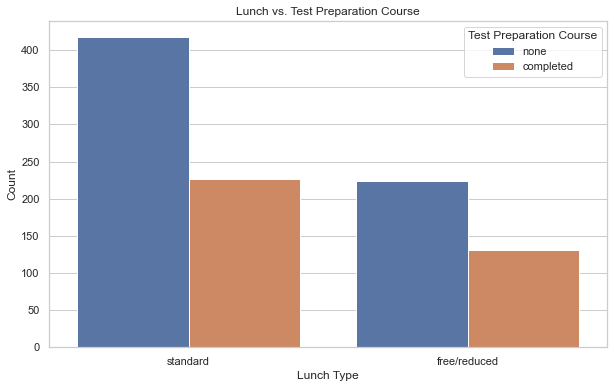

In [54]:
# Create a grouped bar plot for lunch vs. test preparation course
plt.figure(figsize=(10, 6))
sns.countplot(x='lunch', hue='test_preparation_course', data=df)

# Set plot title and labels
plt.title('Lunch vs. Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Count')

# Customize the legend
plt.legend(title='Test Preparation Course', loc='upper right')

# Show the plot
plt.show()

In [ ]:
df.head()

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


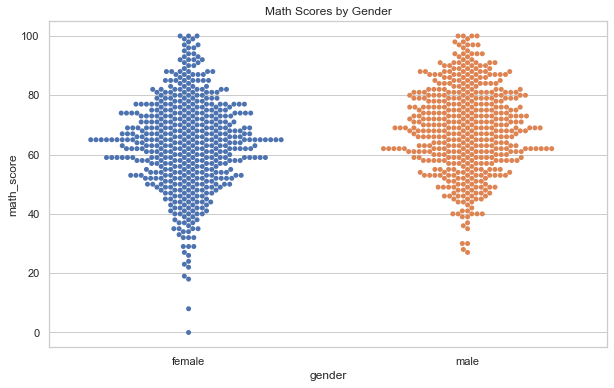

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


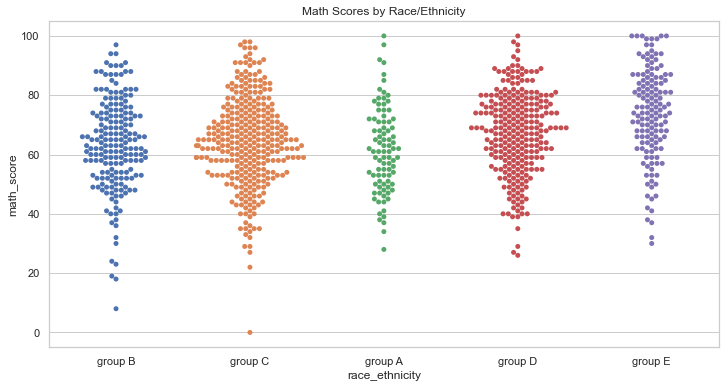

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


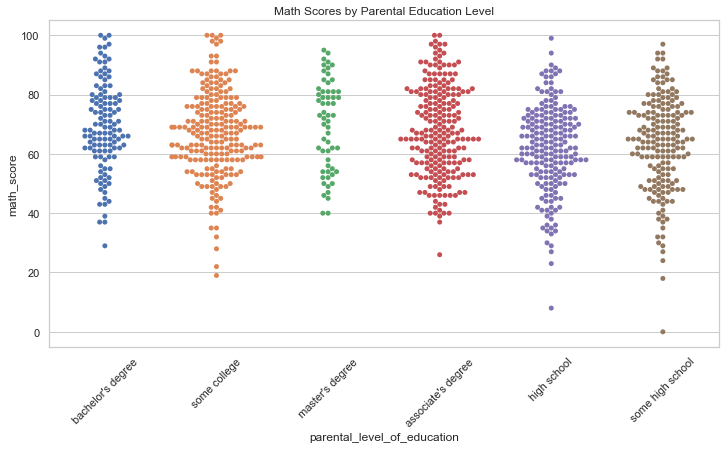

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


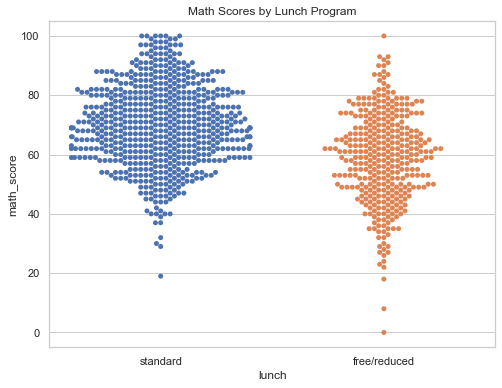

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


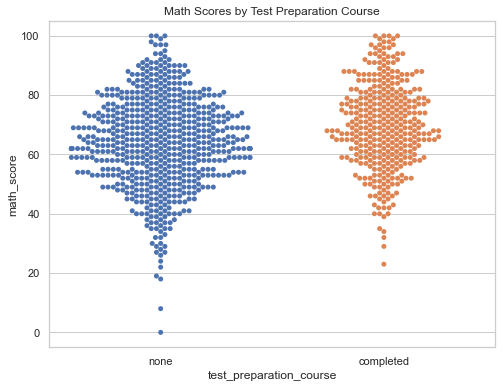

In [55]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bee swarm plot for math scores by gender
plt.figure(figsize=(10, 6))
sns.swarmplot(x='gender', y='math_score', data=df)
plt.title('Math Scores by Gender')
plt.show()

# Create a bee swarm plot for math scores by race/ethnicity
plt.figure(figsize=(12, 6))
sns.swarmplot(x='race_ethnicity', y='math_score', data=df)
plt.title('Math Scores by Race/Ethnicity')
plt.show()

# Create a bee swarm plot for math scores by parental education level
plt.figure(figsize=(12, 6))
sns.swarmplot(x='parental_level_of_education', y='math_score', data=df)
plt.title('Math Scores by Parental Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Create a bee swarm plot for math scores by lunch program
plt.figure(figsize=(8, 6))
sns.swarmplot(x='lunch', y='math_score', data=df)
plt.title('Math Scores by Lunch Program')
plt.show()

# Create a bee swarm plot for math scores by test preparation
plt.figure(figsize=(8, 6))
sns.swarmplot(x='test_preparation_course', y='math_score', data=df)
plt.title('Math Scores by Test Preparation Course')
plt.show()

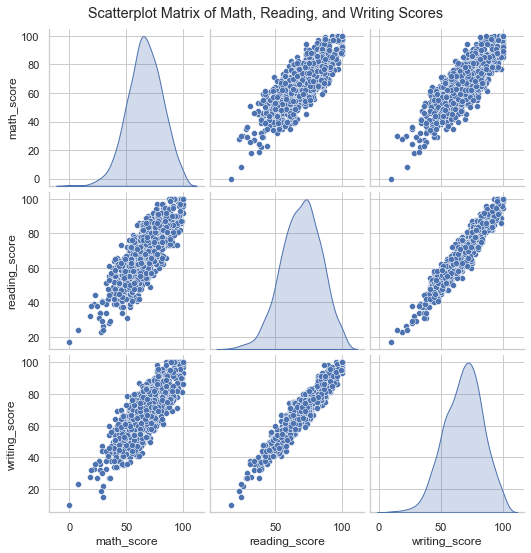

In [56]:
# Select the variables you want to include in the scatterplot matrix
selected_vars = df[['math_score', 'reading_score', 'writing_score']]

# Create a scatterplot matrix
sns.pairplot(selected_vars, diag_kind='kde')
plt.suptitle('Scatterplot Matrix of Math, Reading, and Writing Scores', y=1.02)
plt.show()

# Multivaraite analysis 

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

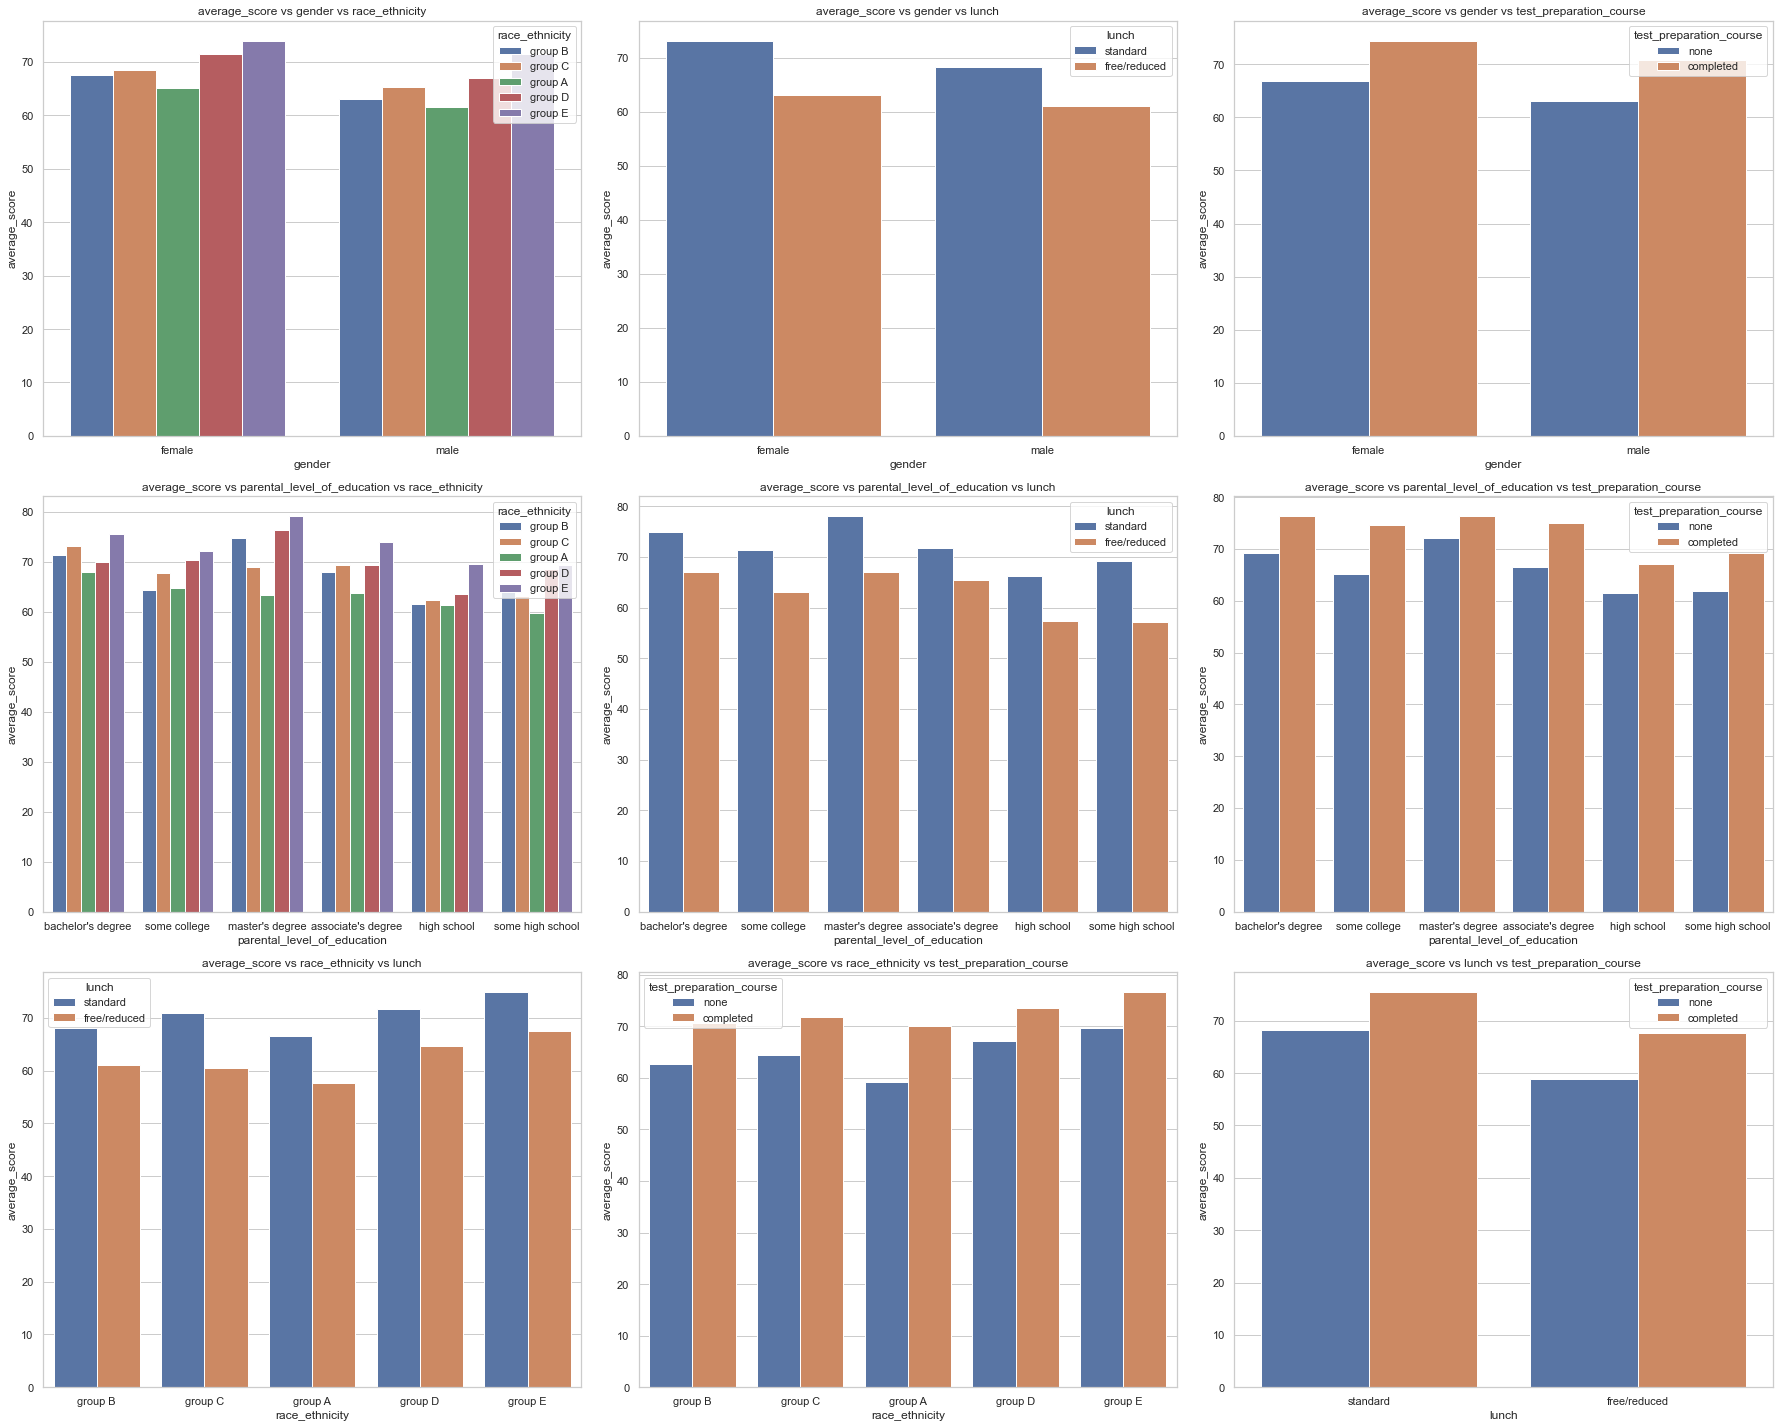

In [57]:
import itertools

# List of combinations of three categorical variables including 'average_score'
combinations = [
    ['average_score', 'gender', 'race_ethnicity'],
    ['average_score', 'gender', 'lunch'],
    ['average_score', 'gender', 'test_preparation_course'],
    ['average_score', 'parental_level_of_education', 'race_ethnicity'],
    ['average_score', 'parental_level_of_education', 'lunch'],
    ['average_score', 'parental_level_of_education', 'test_preparation_course'],
    ['average_score', 'race_ethnicity', 'lunch'],
    ['average_score', 'race_ethnicity', 'test_preparation_course'],
    ['average_score', 'lunch', 'test_preparation_course']
]

# Create subplots with a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(25, 20))

# Create bar plots for each combination
for i, combo in enumerate(combinations):
    row = i // 3
    col = i % 3

    sns.barplot(x=combo[1], y=combo[0], hue=combo[2], data=df, ax=axes[row, col],ci=None)
    axes[row, col].set_title('{} vs {} vs {}'.format(combo[0], combo[1], combo[2]))

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [ ]:
df.head()

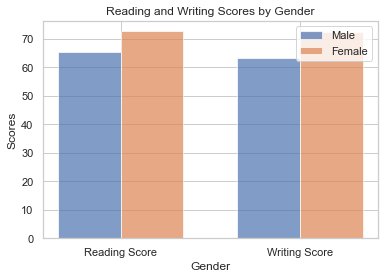

In [58]:
# Separate the data by gender
male_data = df[df['gender'] == 'male']
female_data = df[df['gender'] == 'female']

# Set the bar width and positions
bar_width = 0.35
index = range(2)

# Get the average reading and writing scores for each gender
male_reading_scores = male_data['reading_score'].mean()
female_reading_scores = female_data['reading_score'].mean()
male_writing_scores = male_data['writing_score'].mean()
female_writing_scores = female_data['writing_score'].mean()

# Create the bar chart
plt.bar([x - bar_width/2 for x in index], [male_reading_scores, male_writing_scores], bar_width, label='Male', alpha=0.7)
plt.bar([x + bar_width/2 for x in index], [female_reading_scores, female_writing_scores], bar_width, label='Female', alpha=0.7)

# Set the labels and title
plt.xlabel('Gender')
plt.xticks(index, ['Reading Score', 'Writing Score'])
plt.ylabel('Scores')
plt.title('Reading and Writing Scores by Gender')

# Set the legend
plt.legend()

# Display the plot
plt.show()

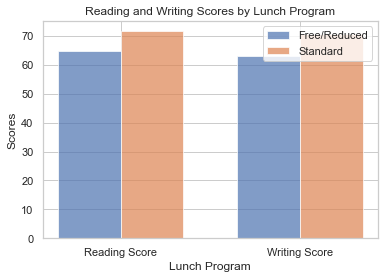

In [59]:
# Separate the data by lunch program
free_reduced_data = df[df['lunch'] == 'free/reduced']
standard_data = df[df['lunch'] == 'standard']

# Set the bar width and positions
bar_width = 0.35
index = range(2)

# Get the average reading and writing scores for each lunch program
free_reduced_reading_scores = free_reduced_data['reading_score'].mean()
standard_reading_scores = standard_data['reading_score'].mean()
free_reduced_writing_scores = free_reduced_data['writing_score'].mean()
standard_writing_scores = standard_data['writing_score'].mean()

# Create the bar chart
plt.bar([x - bar_width/2 for x in index], [free_reduced_reading_scores, free_reduced_writing_scores], bar_width, label='Free/Reduced', alpha=0.7)
plt.bar([x + bar_width/2 for x in index], [standard_reading_scores, standard_writing_scores], bar_width, label='Standard', alpha=0.7)

# Set the labels and title
plt.xlabel('Lunch Program')
plt.xticks(index, ['Reading Score', 'Writing Score'])
plt.ylabel('Scores')
plt.title('Reading and Writing Scores by Lunch Program')

# Set the legend
plt.legend()

# Display the plot
plt.show()

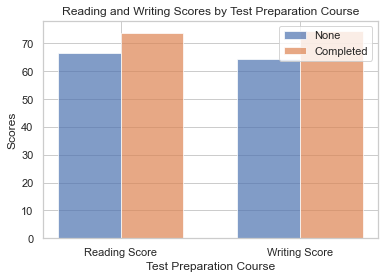

In [60]:
# Separate the data by test preparation course
none_data = df[df['test_preparation_course'] == 'none']
completed_data = df[df['test_preparation_course'] == 'completed']

# Set the bar width and positions
bar_width = 0.35
index = range(2)

# Get the average reading and writing scores for each test preparation course
none_reading_scores = none_data['reading_score'].mean()
completed_reading_scores = completed_data['reading_score'].mean()
none_writing_scores = none_data['writing_score'].mean()
completed_writing_scores = completed_data['writing_score'].mean()

# Create the bar chart
plt.bar([x - bar_width/2 for x in index], [none_reading_scores, none_writing_scores], bar_width, label='None', alpha=0.7)
plt.bar([x + bar_width/2 for x in index], [completed_reading_scores, completed_writing_scores], bar_width, label='Completed', alpha=0.7)

# Set the labels and title
plt.xlabel('Test Preparation Course')
plt.xticks(index, ['Reading Score', 'Writing Score'])
plt.ylabel('Scores')
plt.title('Reading and Writing Scores by Test Preparation Course')

# Set the legend
plt.legend()

# Display the plot
plt.show()

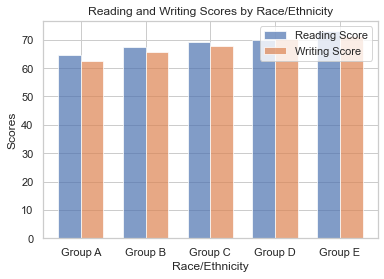

In [61]:
# Separate the data by race/ethnicity
group_A_data = df[df['race_ethnicity'] == 'group A']
group_B_data = df[df['race_ethnicity'] == 'group B']
group_C_data = df[df['race_ethnicity'] == 'group C']
group_D_data = df[df['race_ethnicity'] == 'group D']
group_E_data = df[df['race_ethnicity'] == 'group E']

# Set the bar width and positions
bar_width = 0.35
index = range(5)

# Get the average reading and writing scores for each race/ethnicity group
group_A_reading_scores = group_A_data['reading_score'].mean()
group_B_reading_scores = group_B_data['reading_score'].mean()
group_C_reading_scores = group_C_data['reading_score'].mean()
group_D_reading_scores = group_D_data['reading_score'].mean()
group_E_reading_scores = group_E_data['reading_score'].mean()

group_A_writing_scores = group_A_data['writing_score'].mean()
group_B_writing_scores = group_B_data['writing_score'].mean()
group_C_writing_scores = group_C_data['writing_score'].mean()
group_D_writing_scores = group_D_data['writing_score'].mean()
group_E_writing_scores = group_E_data['writing_score'].mean()

# Create the grouped bar chart
plt.bar([x - bar_width/2 for x in index], [group_A_reading_scores, group_B_reading_scores, group_C_reading_scores, group_D_reading_scores, group_E_reading_scores], bar_width, label='Reading Score', alpha=0.7)
plt.bar([x + bar_width/2 for x in index], [group_A_writing_scores, group_B_writing_scores, group_C_writing_scores, group_D_writing_scores, group_E_writing_scores], bar_width, label='Writing Score', alpha=0.7)

# Set the labels and title
plt.xlabel('Race/Ethnicity')
plt.xticks(index, ['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.ylabel('Scores')
plt.title('Reading and Writing Scores by Race/Ethnicity')

# Set the legend
plt.legend()

# Display the plot
plt.show()

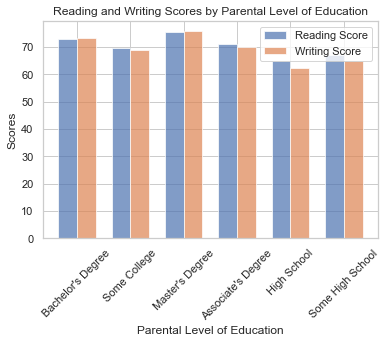

In [62]:
# Separate the data by parental level of education
bachelors_data = df[df['parental_level_of_education'] == "bachelor's degree"]
some_college_data = df[df['parental_level_of_education'] == 'some college']
masters_data = df[df['parental_level_of_education'] == "master's degree"]
associates_data = df[df['parental_level_of_education'] == "associate's degree"]
high_school_data = df[df['parental_level_of_education'] == 'high school']
some_high_school_data = df[df['parental_level_of_education'] == 'some high school']

# Set the bar width and positions
bar_width = 0.35
index = range(6)

# Get the average reading and writing scores for each parental level of education
bachelors_reading_scores = bachelors_data['reading_score'].mean()
some_college_reading_scores = some_college_data['reading_score'].mean()
masters_reading_scores = masters_data['reading_score'].mean()
associates_reading_scores = associates_data['reading_score'].mean()
high_school_reading_scores = high_school_data['reading_score'].mean()
some_high_school_reading_scores = some_high_school_data['reading_score'].mean()

bachelors_writing_scores = bachelors_data['writing_score'].mean()
some_college_writing_scores = some_college_data['writing_score'].mean()
masters_writing_scores = masters_data['writing_score'].mean()
associates_writing_scores = associates_data['writing_score'].mean()
high_school_writing_scores = high_school_data['writing_score'].mean()
some_high_school_writing_scores = some_high_school_data['writing_score'].mean()

# Create the grouped bar chart
plt.bar([x - bar_width/2 for x in index], [bachelors_reading_scores, some_college_reading_scores, masters_reading_scores, associates_reading_scores, high_school_reading_scores, some_high_school_reading_scores], bar_width, label='Reading Score', alpha=0.7)
plt.bar([x + bar_width/2 for x in index], [bachelors_writing_scores, some_college_writing_scores, masters_writing_scores, associates_writing_scores, high_school_writing_scores, some_high_school_writing_scores], bar_width, label='Writing Score', alpha=0.7)

# Set the labels and title
plt.xlabel("Parental Level of Education")
plt.xticks(index, ["Bachelor's Degree", 'Some College', "Master's Degree", "Associate's Degree", 'High School', 'Some High School'], rotation=45)
plt.ylabel('Scores')
plt.title('Reading and Writing Scores by Parental Level of Education')

# Set the legend
plt.legend()

# Display the plot
plt.show()

#  Hypothesis Testing 

# One-Sample t-Test 

# Math , Reading , Writing Scores

In [ ]:
df.head()

In [16]:
from scipy.stats import ttest_1samp

In [ ]:
# Print the length of each scores column
print("Number of records in the Math Score column:", len(df['math_score']))
print("Number of records in the Writing Score column:", len(df['writing_score']))
print("Number of records in the Reading Score column:", len(df['reading_score']))


In [17]:
# Calculate the means for math, writing, and reading scores
math_mean = df['math_score'].mean()
writing_mean = df['writing_score'].mean()
reading_mean = df['reading_score'].mean()

# Print the means
print("Mean of Math Score:", math_mean)
print("Mean of Writing Score:", writing_mean)
print("Mean of Reading Score:", reading_mean)


Mean of Math Score: 66.089
Mean of Writing Score: 68.054
Mean of Reading Score: 69.169


In [18]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Sample size
sample_size = 20

# Randomly sample 20 rows from the math score column
math_sample = np.random.choice(df['math_score'], sample_size)

# Randomly sample 20 rows from the writing score column
writing_sample = np.random.choice(df['writing_score'], sample_size)

# Randomly sample 20 rows from the reading score column
reading_sample = np.random.choice(df['reading_score'], sample_size)

# Print the samples
print("Math Score Sample:")
print(math_sample)

print("\nWriting Score Sample:")
print(writing_sample)

print("\nReading Score Sample:")
print(reading_sample)


Math Score Sample:
[62 73 44 62 60 62 66 80 38 50 59 58 73 65 58 68 54 50 59 62]

Writing Score Sample:
[ 56  88  74  54  63  69  76  62  84  48  43 100  74  60  92  58  50  70
  42  67]

Reading Score Sample:
[67 75 77 95 84 87 68 42 85 75 54 42 72 74 63 95 70 74 67 64]


In [19]:
from scipy import stats


# Define the null and alternative hypotheses
null_hypothesis = "The sample mean is equal to the population mean."
alternative_hypothesis = "The sample mean is not equal to the population mean."

# Perform one-sample t-test for math_sample
t_stat_math, p_value_math = stats.ttest_1samp(math_sample, 66)

# Perform one-sample t-test for writing_sample
t_stat_writing, p_value_writing = stats.ttest_1samp(writing_sample, 68)

# Perform one-sample t-test for reading_sample
t_stat_reading, p_value_reading = stats.ttest_1samp(reading_sample, 69)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results and print statements
def interpret_results(p_value, sample_name):
    if p_value > alpha:
        print(f"For {sample_name}:")
        print(f"Null Hypothesis (H0): {null_hypothesis}")
        print(f"Alternative Hypothesis (H1): {alternative_hypothesis}")
        print(f"P-value: {p_value:.4f}")
        print("Result: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.\n")
    else:
        print(f"For {sample_name}:")
        print(f"Null Hypothesis (H0): {null_hypothesis}")
        print(f"Alternative Hypothesis (H1): {alternative_hypothesis}")
        print(f"P-value: {p_value:.4f}")
        print("Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.\n")

# Interpret the results for each sample
interpret_results(p_value_math, "Math Score Sample")
interpret_results(p_value_writing, "Writing Score Sample")
interpret_results(p_value_reading, "Reading Score Sample")


For Math Score Sample:
Null Hypothesis (H0): The sample mean is equal to the population mean.
Alternative Hypothesis (H1): The sample mean is not equal to the population mean.
P-value: 0.0161
Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.

For Writing Score Sample:
Null Hypothesis (H0): The sample mean is equal to the population mean.
Alternative Hypothesis (H1): The sample mean is not equal to the population mean.
P-value: 0.6821
Result: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.

For Reading Score Sample:
Null Hypothesis (H0): The sample mean is equal to the population mean.
Alternative Hypothesis (H1): The sample mean is not equal to the population mean.
P-value: 0.4494
Result: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.



# 2 Sample t-Test 

In [69]:
from scipy import stats

def two_sample_t_test(df, column1, column2):
    # Define the null and alternative hypotheses
    null_hypothesis = f"The population mean of {column1} is equal to the population mean of {column2}."
    alternative_hypothesis = f"The population mean of {column1} is not equal to the population mean of {column2}."

    # Perform two-sample t-test
    t_stat, p_value = stats.ttest_ind(df[column1], df[column2])

    # Define the significance level (alpha)
    alpha = 0.05

    # Interpret the results and print statements
    if p_value > alpha:
        print(f"For {column1} vs {column2}:")
        print(f"Null Hypothesis (H0): {null_hypothesis}")
        print(f"Alternative Hypothesis (H1): {alternative_hypothesis}")
        print(f"P-value: {p_value:.10f}")
        print(f"Result: Fail to reject the null hypothesis. The population mean of {column1} is not significantly different from the population mean of {column2}.\n")
    else:
        print(f"For {column1} vs {column2}:")
        print(f"Null Hypothesis (H0): {null_hypothesis}")
        print(f"Alternative Hypothesis (H1): {alternative_hypothesis}")
        print(f"P-value: {p_value:.10f}")
        print(f"Result: Reject the null hypothesis. The population mean of {column1} is significantly different from the population mean of {column2}.\n")

# Example usage:
two_sample_t_test(df, 'math_score', 'reading_score')


For math_score vs reading_score:
Null Hypothesis (H0): The population mean of math_score is equal to the population mean of reading_score.
Alternative Hypothesis (H1): The population mean of math_score is not equal to the population mean of reading_score.
P-value: 0.0000039464
Result: Reject the null hypothesis. The population mean of math_score is significantly different from the population mean of reading_score.



# Man Whitney U test 

In [52]:
from scipy.stats import mannwhitneyu


In [78]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df, column1, column2):
   
    # Define the null and alternative hypotheses
    null_hypothesis = f"The population mean of {column1} is equal to the population mean of {column2}."
    alternative_hypothesis = f"The population mean of {column1} is not equal to the population mean of {column2}."

    # Define the significance level (alpha)
    alpha = 0.05
    # Perform Mann-Whitney U test
    mann_stat, p_value = mannwhitneyu(df[column1], df[column2])

    if p_value > alpha:
        print(f"For {column1} vs {column2}:")
        print(f"Null Hypothesis (H0): {null_hypothesis}")
        print(f"Alternative Hypothesis (H1): {alternative_hypothesis}")
        print(f"P-value: {p_value:.10f}")
        print(f"Result: Fail to reject the null hypothesis. The population mean of {column1} is not significantly different from the population mean of {column2}.\n")
    else:
        print(f"For {column1} vs {column2}:")
        print(f"Null Hypothesis (H0): {null_hypothesis}")
        print(f"Alternative Hypothesis (H1): {alternative_hypothesis}")
        print(f"P-value: {p_value:.10f}")
        print(f"Result: Reject the null hypothesis. The population mean of {column1} is significantly different from the population mean of {column2}.\n")

# Example usage:
mann_whitney_u_test(df, 'math_score', 'reading_score')


For math_score vs reading_score:
Null Hypothesis (H0): The population mean of math_score is equal to the population mean of reading_score.
Alternative Hypothesis (H1): The population mean of math_score is not equal to the population mean of reading_score.
P-value: 0.0000057639
Result: Reject the null hypothesis. The population mean of math_score is significantly different from the population mean of reading_score.



# CHI-SQUARE Test

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73,218
1,female,group C,some college,standard,completed,69,90,88,82,247
2,female,group B,master's degree,standard,none,90,95,93,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,148
4,male,group C,some college,standard,none,76,78,75,76,229


In [4]:
dataset_table=pd.crosstab(df['gender'],df['lunch'])
print(dataset_table)

lunch   free/reduced  standard
gender                        
female           189       329
male             166       316


In [5]:
dataset_table.values 

array([[189, 329],
       [166, 316]], dtype=int64)

In [6]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[189 329]
 [166 316]]


In [7]:
val=stats.chi2_contingency(dataset_table)


In [8]:
val

(0.37173802316040705,
 0.5420584175146086,
 1,
 array([[183.89, 334.11],
        [171.11, 310.89]]))

In [9]:
Expected_Values=val[3]

In [10]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
     

Degree of Freedom:- 1


In [11]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [12]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.4567482947363723


In [13]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [14]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.4991475958963969
Significance level:  0.05
Degree of Freedom:  1


In [16]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between Gender and lunch variables")
else:
    print("Failed to reject H0,There is no relationship between Gender and lunch variables")

Failed to reject H0,There is no relationship between Gender and lunch variables


In [3]:
import pandas as pd
from scipy import stats


from scipy.stats import chi2

def perform_chi_square_test(df, var1, var2):
    # Create a contingency table
    dataset_table = pd.crosstab(df[var1], df[var2])
    
    # Get observed values
    Observed_Values = dataset_table.values
    
    # Perform the chi-square test
    val = stats.chi2_contingency(dataset_table)
    
    # Get expected values
    Expected_Values = val[3]
    
    # Calculate degrees of freedom
    no_of_rows = len(dataset_table.iloc[0:2, 0])
    no_of_columns = len(dataset_table.iloc[0, 0:2])
    ddof = (no_of_rows - 1) * (no_of_columns - 1)
    
    # Set the significance level
    alpha = 0.05
    
    # Calculate the chi-square statistic
    chi_square = sum([(o - e)**2. / e for o, e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    
    # Calculate the critical value
    critical_value = chi2.ppf(q=1 - alpha, df=ddof)
    
    # Calculate the p-value
    p_value = 1 - chi2.cdf(x=chi_square_statistic, df=ddof)
    
    print('p-value:', p_value)
    print('Significance level:', alpha)
    print('Degree of Freedom:', ddof)
    
    if p_value <= alpha:
        return "Reject H0, There is a relationship between {} and {} variables".format(var1, var2)
    else:
        return "Failed to reject H0, There is no relationship between {} and {} variables".format(var1, var2)

# Example usage
result = perform_chi_square_test(df, 'lunch', 'gender')
print(result)


p-value: 0.4991475958963967
Significance level: 0.05
Degree of Freedom: 1
Failed to reject H0, There is no relationship between lunch and gender variables


In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73,218
1,female,group C,some college,standard,completed,69,90,88,82,247
2,female,group B,master's degree,standard,none,90,95,93,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,148
4,male,group C,some college,standard,none,76,78,75,76,229


In [81]:
dataset_table

race_ethnicity,group A,group B,group C,group D,group E
parental_level_of_education,,,,,
associate's degree,14,41,78,50,39
bachelor's degree,12,20,40,28,18
high school,18,48,64,44,22
master's degree,3,6,19,23,8
some college,18,37,69,67,35
some high school,24,38,49,50,18


# One Way Anova

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73,218
1,female,group C,some college,standard,completed,69,90,88,82,247
2,female,group B,master's degree,standard,none,90,95,93,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,148
4,male,group C,some college,standard,none,76,78,75,76,229


In [7]:
# Extract the scores into separate variables
math_scores = df['math_score']
reading_scores = df['reading_score']
writing_scores = df['writing_score']

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(math_scores, reading_scores, writing_scores)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("One-Way ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.5f}")
print(f"P-value: {p_value:.10f}")

# Interpret the results
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in at least one of the mean scores.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in the mean scores.")

One-Way ANOVA Test Results:
F-statistic: 10.82419
P-value: 0.0000207019
Result: Reject the null hypothesis. There is a significant difference in at least one of the mean scores.


# Kruskal wallis test

In [9]:
# Perform the Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(math_scores, reading_scores, writing_scores)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {h_statistic:.5f}")
print(f"P-value: {p_value:.10f}")

# Interpret the results
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in at least one of mean scores.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in the mean scores .")

Kruskal-Wallis Test Results:
H-statistic: 21.22498
P-value: 0.0000246067
Result: Reject the null hypothesis. There is a significant difference in at least one of mean scores.
